## ESE 527 Project  TMDB Box Office Prediction

Jiayi Zhou,Ruiying Wang

In [65]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter

## Data Preprocessing:

Load the train and test dataset

In [66]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [67]:
train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [69]:
train.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [70]:
train.shape

(3000, 23)

In [71]:
test.shape

(4398, 22)

Draw the graph to show top 20 movies at revenue and their corresponding runtime and budget

In [73]:
train[['id','title','runtime', 'budget', 'revenue']].sort_values(['revenue'],ascending=False).head(20).style.background_gradient(subset=['revenue','runtime','budget'], cmap='PuBu')

,id,title,runtime,budget,revenue
1126,1127,The Avengers,143.000000,220000000,1519557910
1761,1762,Furious 7,137.000000,190000000,1506249360
2770,2771,Avengers: Age of Ultron,141.000000,280000000,1405403694
684,685,Beauty and the Beast,129.000000,160000000,1262886337
2322,2323,Transformers: Dark of the Moon,154.000000,195000000,1123746996
906,907,The Dark Knight Rises,165.000000,250000000,1084939099
2135,2136,Pirates of the Caribbean: On Stranger Tides,136.000000,380000000,1045713802
2562,2563,Finding Dory,97.000000,200000000,1028570889
881,882,Alice in Wonderland,108.000000,200000000,1025491110
734,735,Zootopia,108.000000,150000000,1023784195


Analysis each column and judge which column can influence the revenue.

-Belongs To Collection-

In [31]:
text_cols = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords']

def text_to_dict(df):
    for col in text_cols:
        df[col] = df[col].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    return df


train = text_to_dict(train)

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


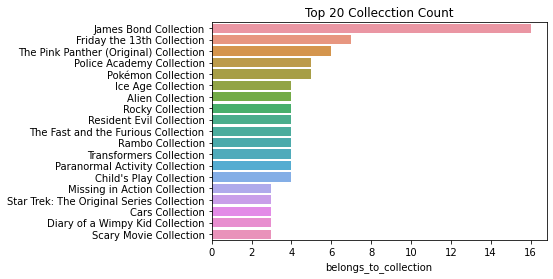

In [35]:
c = train['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0).value_counts()[1:20]
sns.barplot(c,c.index)
plt.title('Top 20 Collecction Count')
plt.show()

-Budget-

Since we found some value in budget is 0 which has no meaning to our dataset or they might be the missing value, we fill out these 0 value with the mean of budget.

In [36]:
mean=train['budget'].mean()
train['budget']=np.where(train['budget']==0,mean,train['budget'])

-Genres-

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


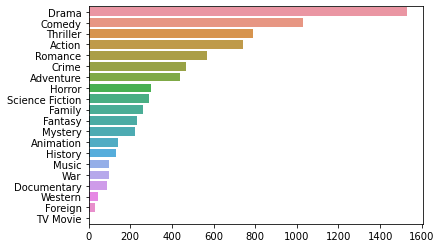

In [37]:
g = train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
g_count = Counter([i for j in g for i in j]).most_common()
sns.barplot([val[1] for val in g_count],[val[0] for val in g_count])
plt.show()

-Spoken Language & Original Language-

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Applications/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Applications/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 35486 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Applications/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph

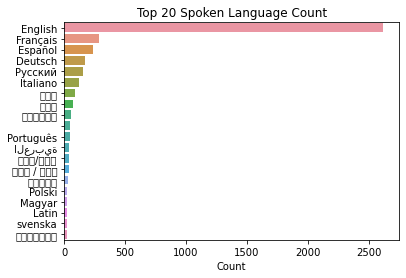

In [48]:
l = train['spoken_languages'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
l_count = Counter([i for j in l for i in j]).most_common(20)
sns.barplot([val[1] for val in l_count],[val[0] for val in l_count])
plt.xlabel('Count')
plt.title('Top 20 Spoken Language Count')
plt.show()

In [44]:
train['original_language'].value_counts()[:10]

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
cn      20
ko      20
zh      19
Name: original_language, dtype: int64

-Popularity-

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'popularity vs revenue')

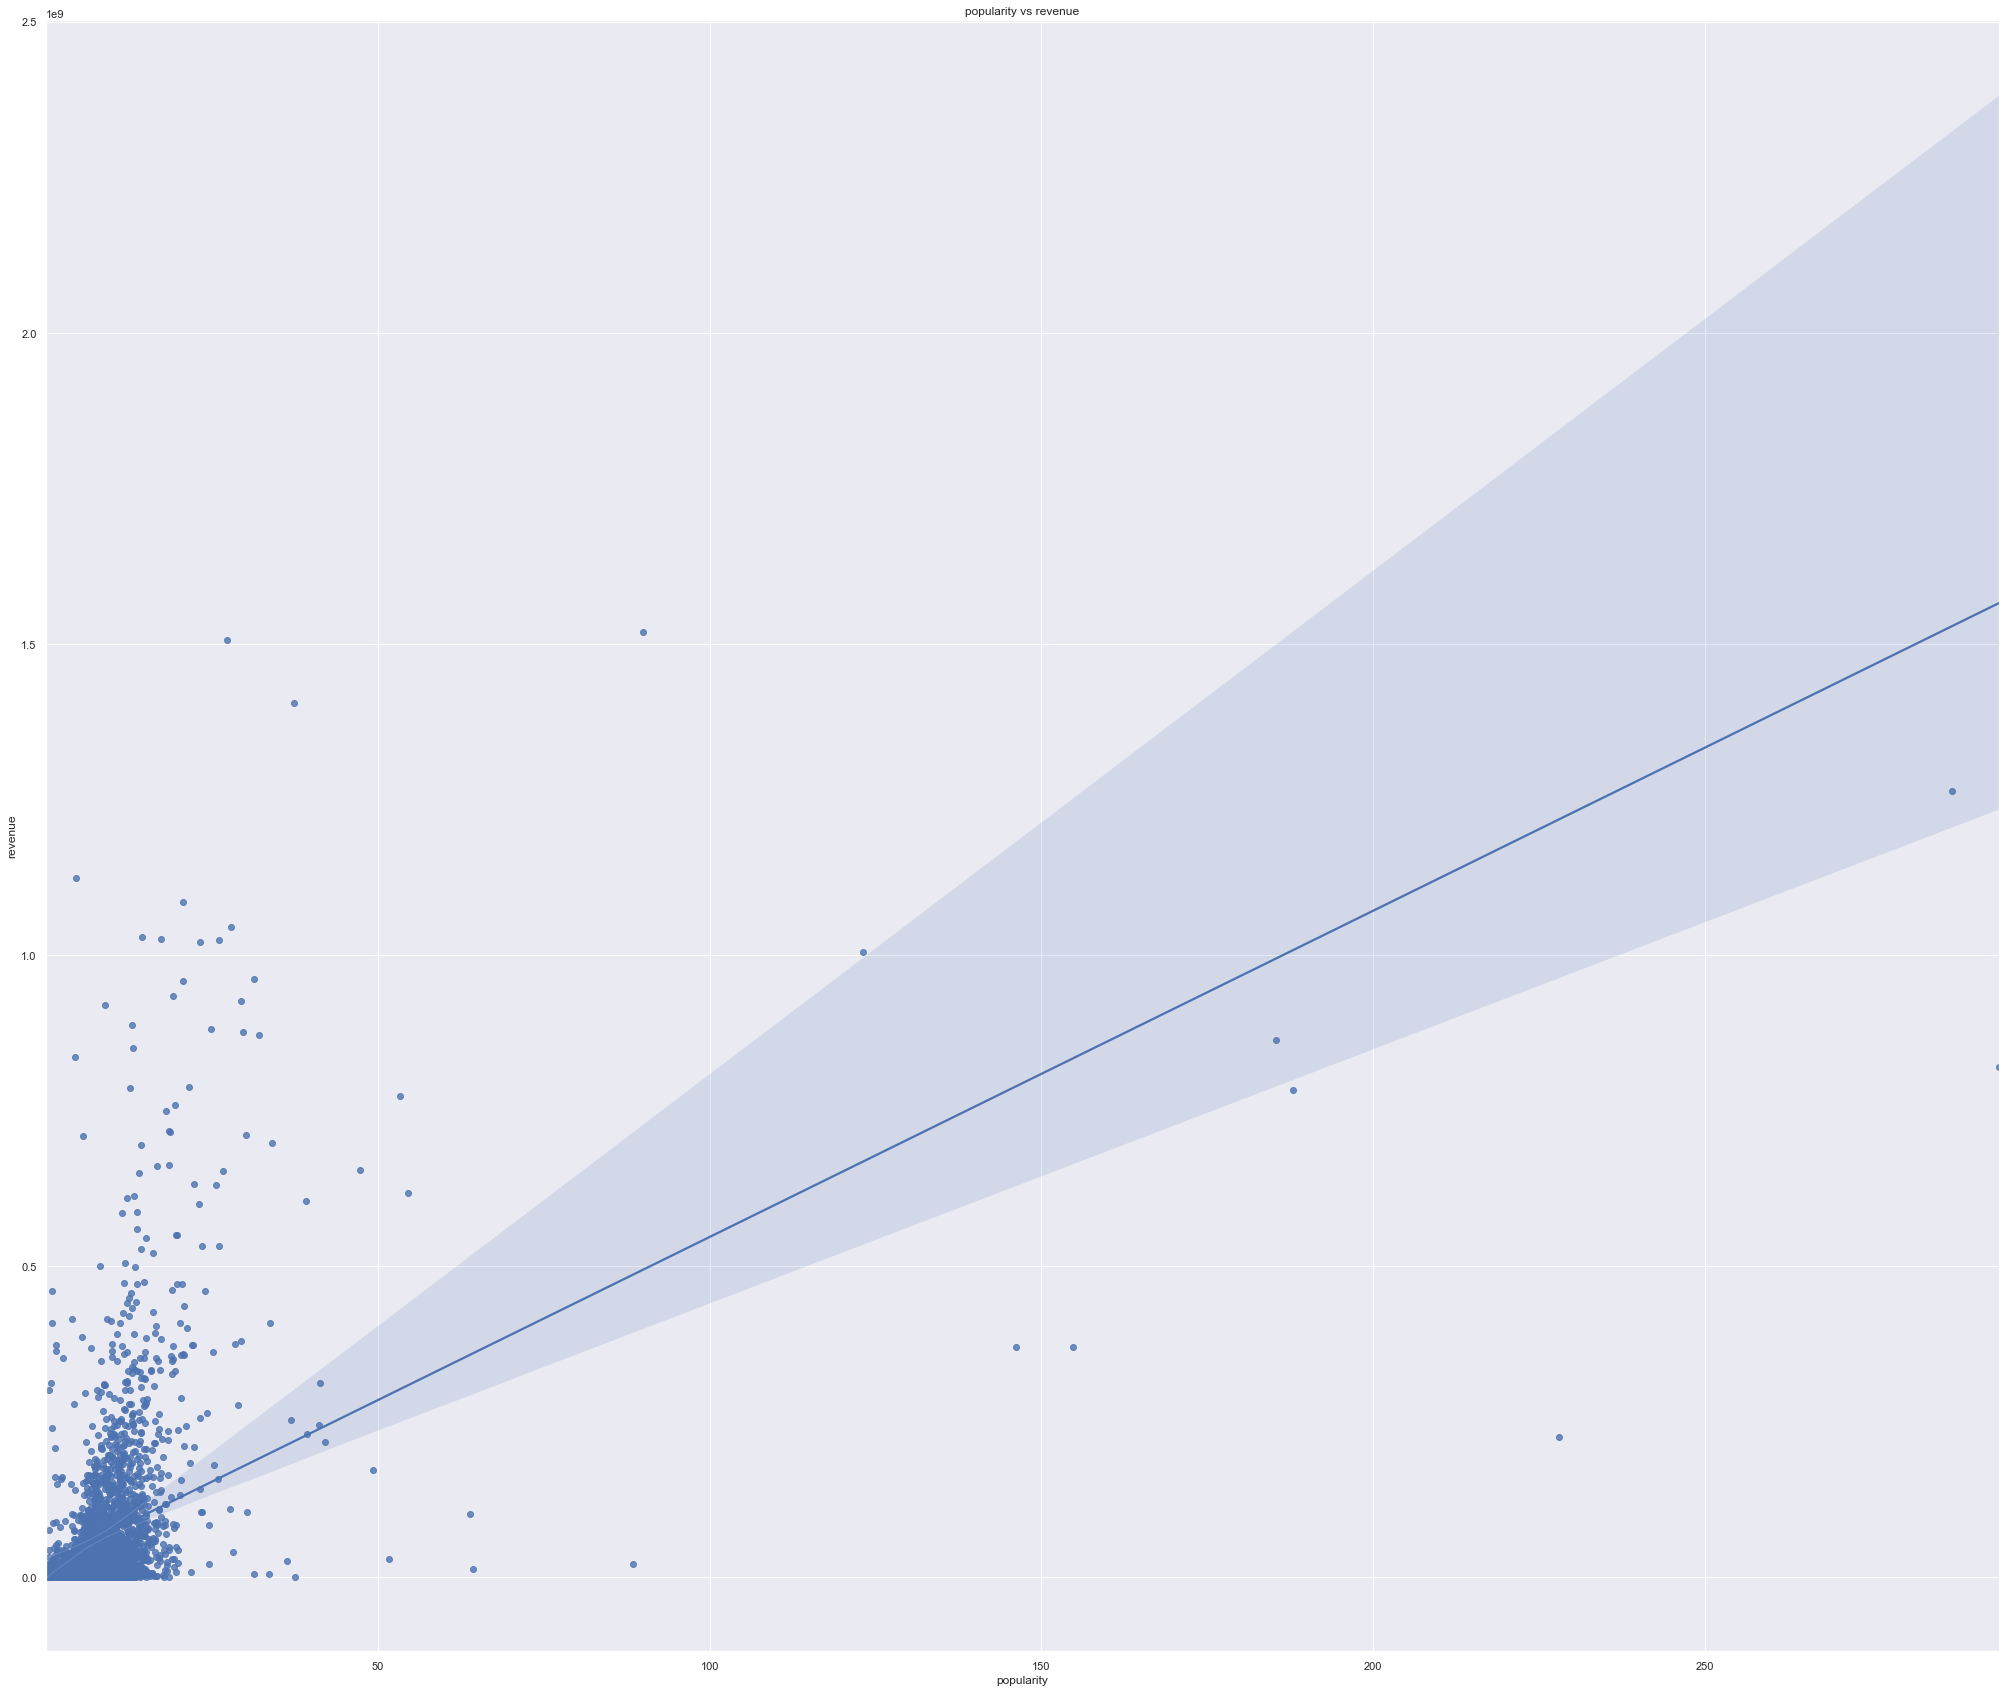

In [62]:
#popularity vs revenue
sns.set()
x=train['popularity']
y=train['revenue']
plt.figure(figsize=(35,30))
sns.regplot(x,y)
plt.xlabel('popularity')
plt.ylabel('revenue')
plt.title( 'popularity vs revenue')

-Homepage-

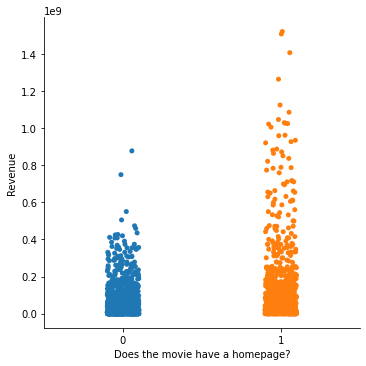

In [49]:
train['has_homepage'] = (1 - train.homepage.isna())
sns.catplot(x='has_homepage', y = 'revenue', data = train)
plt.xlabel('Does the movie have a homepage?')
plt.ylabel('Revenue')
plt.show()

In [57]:
x=np.where(train['homepage'].isnull().values==True)
len_null=len(x[0])
re=0
for i in x[0]:
    re=re+train['revenue'][i]
re_nh=re/len_null
re_h=(sum(train['revenue'])-re)/(3000-len_null)
print("revenue-nonhomepage",re_nh)
print("revenue-homepage",re_h)

revenue-nonhomepage 42165846.42940604
revenue-homepage 120051698.8372093


-Status-

In [53]:
train['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

-Release Date-

In [54]:
train[['release_month','release_day','release_year']]=train['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)
train.loc[ (train['release_year'] <= 19) & (train['release_year'] < 100), "release_year"] += 2000
train.loc[ (train['release_year'] > 19)  & (train['release_year'] < 100), "release_year"] += 1900
releaseDate = pd.to_datetime(train['release_date']) 
train['release_dayofweek'] = releaseDate.dt.dayofweek
train['release_quarter'] = releaseDate.dt.quarter

Text(0.5, 1.0, 'Movie Mean Revenue By Year')

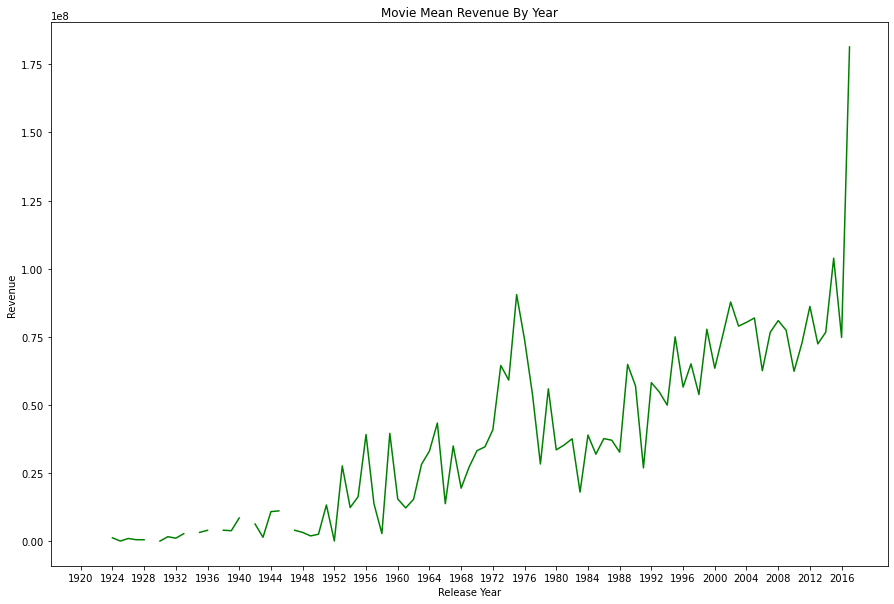

In [55]:
train['meanRevenueByYear'] = train.groupby("release_year")["revenue"].aggregate('mean')
train['meanRevenueByYear'].plot(figsize=(15,10),color="g")
plt.xticks(np.arange(1920,2018,4))
plt.xlabel("Release Year")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue By Year")

-Tagline-

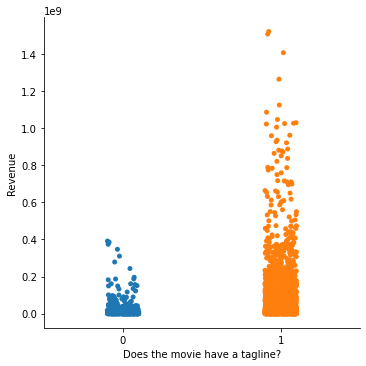

In [41]:
train['has_tagline'] = 1 - train['tagline'].isna()
sns.catplot(x="has_tagline", y="revenue", data=train)
plt.xlabel('Does the movie have a tagline?')
plt.ylabel('Revenue')
plt.show()

In [58]:
y= np.where(train['tagline'].isnull().values==True)
len_null=len(y[0])
re=0
for i in y[0]:
    re=re+train['revenue'][i]
re_nt=re/len_null
re_t=(sum(train['revenue'])-re)/(3000-len_null)
print("revenue-nontag",re_nt)
print("revenue-tag",re_t)

revenue-nontag 16966242.201005027
revenue-tag 79088101.98585102


-Production Countries-

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


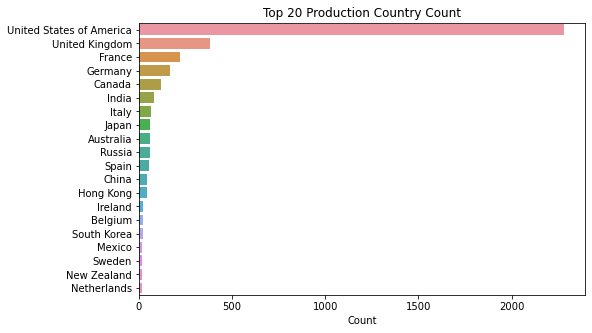

In [56]:
# Show which country produced most movies
countries_per = train['production_countries'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
countries_count = Counter([i for j in countries_per for i in j]).most_common(20)
fig = plt.figure(figsize=(8, 5))
sns.barplot([val[1] for val in countries_count],[val[0] for val in countries_count])
plt.xlabel('Count')
plt.title('Top 20 Production Country Count')
plt.show()

Use the heatmap to check the correlation of numerical variable.

<AxesSubplot:>

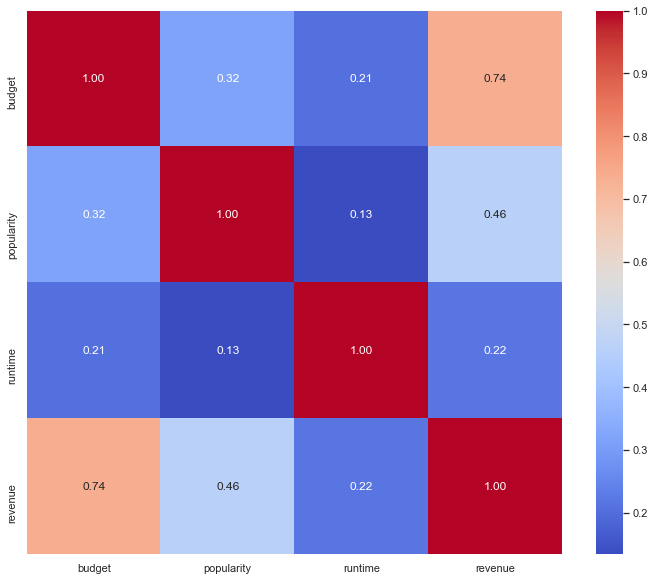

In [63]:
plt.figure(figsize=(12,10))
sns.heatmap(train[['budget','popularity','runtime','revenue']].corr(),annot=True, cmap='coolwarm',fmt='.2f')

## Model